## Clipping Outliers: NYC hotel pricing dataset analysis

Sometimes, while analyzing a dataset, remove(we might need to remove some data which can be regarded as outliers). Outliers can exert undue influence on some models, like linear regression, when the models try to minimize mean squared error. These outliers can sometimes mislead the set of data and influence model performance. 

In such cases, clipping the outliers would be more appropriate. There are a few ways to replacing the outliers from a dataset. One of the method is called clipping. 

Clipping data from a dataset means to clip the data at the last permitted extreme value, e.g. the 1st or 95th percentile value. For example, when we clip the data to 99th percentile, values over the 99th percentile will be interpolated within the 99th percentile meaning all the values in the data are now less than or equal to 99 percentile value.  

## Problem Description

In this problem, we want to apply a prediction model that predicts the price of hotels in NYC based on its features. Our predictor is the `price` variable and other features are mostly categorical. We want to predict the price of a hotel .So we want to check for outliers in the `price` data for our prediction to be accurate when a model is applied. Our target column `price` doesnt have any missing values.

For our problem, we are using the **NYC_2019.csv** dataset.  

First , we load our dataset "New York Housing" into a dataframe and view it.

### Load the Dataset and View data

In [1]:
import pandas as pd
nyc=pd.read_csv("../datasets/AB_NYC_2019.csv")
nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Check for outliers in `price` data

Since we are looking to find out the outliers in the hotel price ,we can apply  a few methods to look for outliers.A very effective way of finding outliers is using visualizations. For finding outliers, scatterplot is useful to see how the datapoints are spread.




### Plot a scatter plot for outlier estimation:

For our scatterplot, we want to see the price data for every datapoint. So our indepent variable would be the index and the dependant variable will be the `price` data. We also need the `matplotlib` library to use the scatterplot.



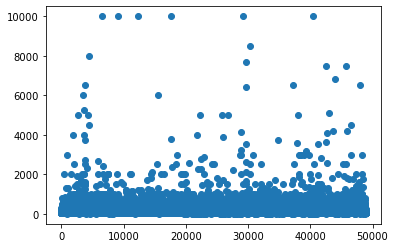

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x= nyc.index, y= nyc['price'])
#plt.hist(nyc['price'],20)
plt.show()


From the scatterplot, we can see that majority of the datapoints are within the range of 0-2000 and a some of them are over 4000. The points beyond them (> 4000) can be considered as outliers for price data. But we need better estimation for finding out the outliers. For further clarification, we can use the `describe` method to see the spread of `price` data by numbers.



### Use `describe()` for `price` distribution in terms of numbers:



In [3]:
nyc['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Here, if we look on the **price** distribution, we can see the min, 25%, 50%, 75% and max price value in that column. The price values ranges from 0 to 1000 and the 75% percentile value of price is 175. This means 75% price value is within 0 -175. So a good amount of values are in the 75-100 range.   

To see more clearly where our outliers actually lies for price, we can use `boxplots`.

### Use `Box Plots` for outlier limit estimation:

Boxplots are very useful to see the distribution of a variable.  It is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. A box plot uses the median and the lower(Q1) and upper(Q3) quartiles (defined as the 25th and 75th percentiles). The difference between the lower quartile is Q1 and the upper quartile(Q3 - Q1) is called the interquartile range or IQ. 

Boxplots help us find the outlier in the data by using the IQ range. As a rule, values that are outside the range of 1.5*QR from Q1 and Q3 are regarded as outliers. The below image will help us better understand the outliers in our data.  

<img src="boxplot.png"
     alt="boxplot icon"
     width="500" 
     height="300"
     style="margin-right: 10px;" />
     


Lets plot our `price` data in a boxplot.     

In [4]:
import matplotlib.pyplot as plt

<AxesSubplot:>

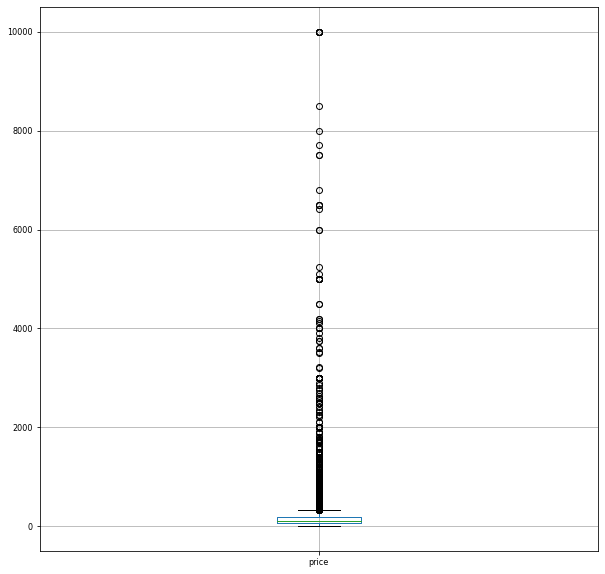

In [5]:

boxplot = nyc.boxplot(figsize = (10,10), column='price', fontsize= '8', grid =True)
boxplot

From the boxplot, we can see that most of the data are out of the interquartile(IQ) range. Our valid range of values (that are not outliers) would be within the range of (Q1-1.5*IQR) and (Q3 + 1.5*IQR). The datapoints outside this range are considered as outliers.


### Find the outliers:

Using the `quantile` formula, we find out our interquartile(IQR) range alongside outlier lower and upper limit for outliers.

In [6]:
## finding outliers

## find the 75th percentile value
q3=nyc['price'].quantile(0.75)

## find the 25th percentile value
q1= nyc['price'].quantile(0.25)

print("q1:",q1)
print("q3:",q3)

## find the interquartile range (IQ)
iqr= q3 - q1
print("iqr:",iqr)

## find the upper and lower bound
upper_bound= q3 + 1.5*iqr
lower_bound= q1 - 1.5*iqr

print("upper bound",upper_bound)
print("lower bound",lower_bound)

q1: 69.0
q3: 175.0
iqr: 106.0
upper bound 334.0
lower bound -90.0


We see that our upper limit is 334 and lower limit -90. -90 means our lower limit is 0. 

Now that we have figured out what will be our upper limit to clip the data from, we just need to find the quantile the upper limit (334) falls into. We do some testing with various percentages to find the quantile closer to our upper limit.

In [7]:
rrth=nyc['price'].quantile(0.95)
ffth=nyc['price'].quantile(0.94)
ggth=nyc['price'].quantile(0.93)

print("95th:",rrth,"94th:",ffth,"93th:",ggth)

95th: 355.0 94th: 340.0 93th: 300.0


From the quantile check, we see that the 94th percentile value (340) is closest to our upper clipping limit. Therefore , we can choose the 94th quantile as our upper clipping limit for `price` data.

## Clip the Outliers:

### Clip `price` data with lower and upper limit:

The clipping method clips the data of a certain column into a range of values. It takes 2 quantile values (upper and lower) and keeps all the values within the value range. For example, if the upper limit is 98 percentile, the values over the 98 percentile will be set to the 98% value using interpolation.

We do the clipping method using the below syntax.

In [8]:
nyc['price']= nyc['price'].clip(nyc['price'].quantile(0.00), nyc['price'].quantile(0.94))

After clippping, we check the max and min value of the `price` data.

In [9]:
nyc['price'].max()

340.0

Notice that our max value has been replaced with values of the 95 percentile value.
The use of clipping method has interpolated the values for us.

In [10]:
nyc['price'].min()

0.0

## Check final clipped data:

We again check the value range of `price` using the `describe` method.

In [11]:
nyc['price'].describe()

count    48895.000000
mean       133.343062
std         84.412427
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        340.000000
Name: price, dtype: float64

After clipping the `price` data, we can see the distribution has become more dense (30-550) which was in the range(0-10000) before. Building a model from the given distribution will give a better estimation of a  hotel price after removing all the outlier values.

## Distribution after clipping data  

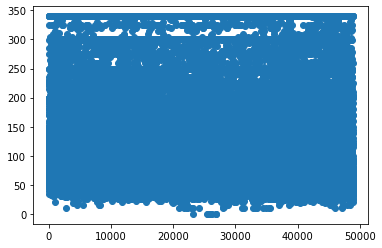

In [12]:
plt.scatter(x= nyc.index, y= nyc['price'])
#plt.hist(nyc['price'],20)
plt.show()

### Conclusion

By using the clipping method, we have removed our outliers from the price data. Now using this dataset will give us good predictions of hotel prices. 

## Scratch

we again look at the distribution of the price data using histogram.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

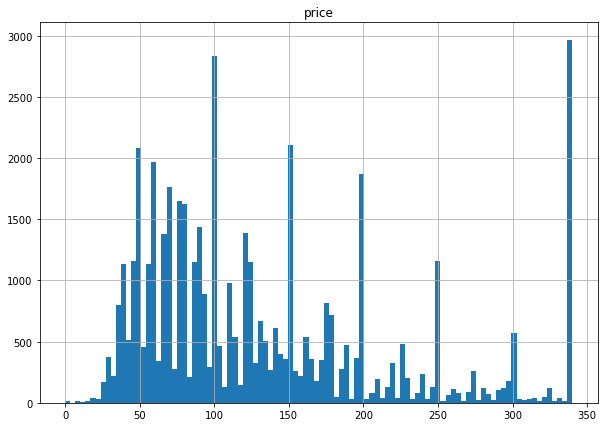

In [13]:
#hist(data=nyc['price'],bins=300)

nyc.hist(column='price',bins=100,figsize=(10,7))



We can see from the above histogram is the data is within the much smaller bound of 350 rather than 10000 as the max value. This way we have removed the outliers.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

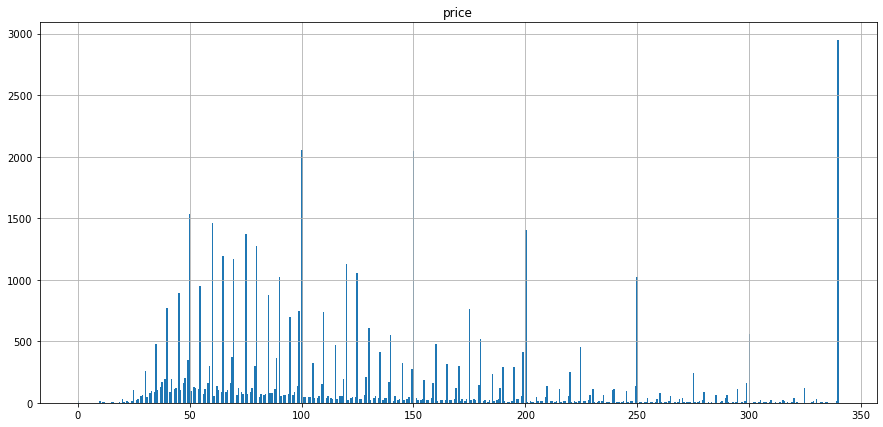

In [14]:

nyc.hist(column='price',bins=500,figsize=(15,7))
